## Importing the libraries

In [2]:
import os
import numpy as np
import pandas as pd
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

## Reading in the data files

In [3]:
df_listings = pd.read_csv('Data/listings.csv', dtype='str')

## Data Exploration

### Listings Dataframe

In [4]:
df_listings.shape

(86358, 106)

In [5]:
pd.set_option('display.max_columns', None)

# show listings data sample
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200414180850,2020-04-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,71%,89%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1,0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,12 months ago,t,27,57,84,359,2020-04-16,21,7,2010-08-18,2020-02-22,97,10,10,10,10,9,9,f,NaN,NaN,f,f,moderate,f,f,2,1,1,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200414180850,2020-04-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,50%,67%,f,https://a0.muscache.com/im/users/60302/

In [6]:
set(df_listings.columns[df_listings.isnull().mean()>0.75])

{'jurisdiction_names',
 'license',
 'medium_url',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'thumbnail_url',
 'weekly_price',
 'xl_picture_url'}

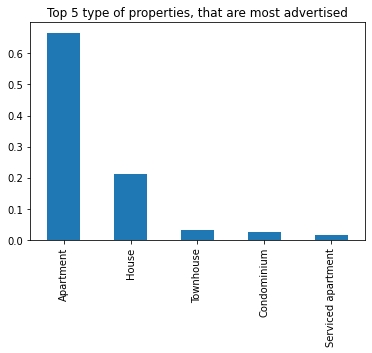

In [7]:
neighbourhood_vals = df_listings['property_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(neighbourhood_vals[0:5]/df_listings.shape[0]).plot(kind="bar");
plt.title("Top 5 type of properties, that are most advertised");

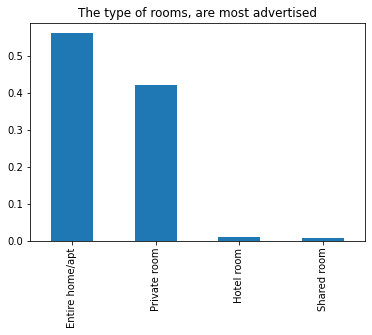

In [8]:
room_vals = df_listings['room_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(room_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("The type of rooms, are most advertised");

## The Business Questions

### What are Airbnb current challanges?

### Question 1
- What is the average price of the listings, for the different location within London?

In [9]:
price_df = df_listings[df_listings['price'].isnull() == False]

In [10]:
price_df.shape

(86358, 106)

In [11]:
price_df['neighbourhood_cleansed'].value_counts()

Westminster               9943
Tower Hamlets             8321
Camden                    6243
Hackney                   6210
Kensington and Chelsea    6079
Islington                 5019
Southwark                 4957
Lambeth                   4881
Wandsworth                4261
Hammersmith and Fulham    4233
Brent                     2605
Lewisham                  2326
Haringey                  2233
Newham                    2071
Ealing                    1790
Greenwich                 1736
Barnet                    1670
Waltham Forest            1476
Merton                    1364
Richmond upon Thames      1217
Hounslow                  1105
Croydon                   1091
Redbridge                  752
Enfield                    710
Hillingdon                 666
Bromley                    654
Kingston upon Thames       550
City of London             491
Harrow                     473
Barking and Dagenham       396
Sutton                     318
Bexley                     261
Havering

In [12]:
price_df['price'] = price_df['price'].str.replace('$', '', regex=True)
price_df['price'] = price_df['price'].str.replace(',', '', regex=True)
price_df['price'] = price_df['price'].astype(float)

In [13]:
nb_price_avg = price_df.groupby('neighbourhood_cleansed', as_index=False).mean()
nb_price_avg = pd.DataFrame(nb_price_avg).sort_values(by='price', ascending=False)

In [14]:
nb_price_avg = nb_price_avg.rename(columns={'neighbourhood_cleansed':'Neighbourhood','price': 'Avg Price'})

[Text(0, 0, 'Westminster'),
 Text(0, 0, 'Kensington and Chelsea'),
 Text(0, 0, 'City of London'),
 Text(0, 0, 'Camden'),
 Text(0, 0, 'Hammersmith and Fulham'),
 Text(0, 0, 'Richmond upon Thames'),
 Text(0, 0, 'Wandsworth'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Islington'),
 Text(0, 0, 'Merton'),
 Text(0, 0, 'Hounslow'),
 Text(0, 0, 'Brent'),
 Text(0, 0, 'Lambeth'),
 Text(0, 0, 'Tower Hamlets'),
 Text(0, 0, 'Hackney'),
 Text(0, 0, 'Barnet'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Greenwich'),
 Text(0, 0, 'Ealing'),
 Text(0, 0, 'Sutton'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'Kingston upon Thames'),
 Text(0, 0, 'Harrow'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Redbridge'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Hillingdon'),
 Text(0, 0, 'Havering'),
 Text(0, 0, 'Enfield'),
 Text(0, 0, 'Bromley'),
 Text(0, 0, 'Barking and Dagenham'),
 Text(0, 0, 'Croydon'),
 Text(0, 0, 'Bexley')]

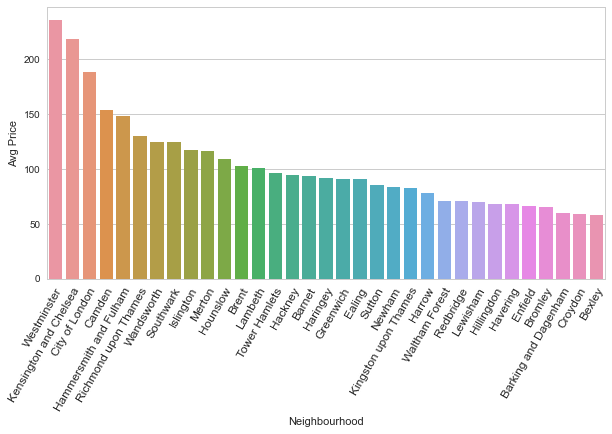

In [15]:
plt.figure(figsize=(10,5))

sns.set(style="whitegrid")
chart = sns.barplot(x="Neighbourhood", y="Avg Price", data=nb_price_avg)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium', 
    rotation_mode='anchor'
)

### Question 2

- What types of verifications are hosts using? How long did it take them to respond?

In [16]:
verifications_df = df_listings[df_listings['host_verifications'].isnull() == False]

In [17]:
verifications_df.shape

(86358, 106)

In [18]:
verifications_df = verifications_df[verifications_df['host_verifications'] != '[]']

In [19]:
verifications_df.shape

(86272, 106)

In [20]:
verifications_df['host_verifications'].value_counts()

['email', 'phone', 'reviews', 'jumio', 'government_id']                                                                                                    9206
['email', 'phone']                                                                                                                                         8562
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']                                              6470
['email', 'phone', 'reviews']                                                                                                                              5497
['email', 'phone', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']                                                                  4872
                                                                                                                                                           ... 
['email', 'phone', 'manual_online', 'rev

In [21]:
def verifications_types(column):
    verifications_dict = {}
    temp = []

    for i in column:
        temp.append(eval(i))
    
    for i in temp:
        try:
            for j in i:
                if j not in verifications_dict:
                    verifications_dict[j] = 1
                else:
                    verifications_dict[j] += 1
        except:
            continue
            
    return verifications_dict
        
verifications_types = verifications_types(verifications_df['host_verifications'])

In [22]:
verifications_types

{'email': 79397,
 'phone': 85821,
 'facebook': 14257,
 'reviews': 55107,
 'offline_government_id': 42144,
 'selfie': 29315,
 'government_id': 64097,
 'jumio': 49014,
 'identity_manual': 27303,
 'work_email': 13213,
 'kba': 403,
 'manual_offline': 1614,
 'manual_online': 739,
 'google': 4121,
 'sent_id': 94,
 'photographer': 2,
 'weibo': 46,
 'sesame': 19,
 'sesame_offline': 19,
 'zhima_selfie': 32}

In [23]:
for k,v in verifications_types.items():
    verifications_types[k] = round(v / verifications_df.shape[0] * 100, 3)

In [24]:
verifications_types

{'email': 92.031,
 'phone': 99.477,
 'facebook': 16.526,
 'reviews': 63.876,
 'offline_government_id': 48.85,
 'selfie': 33.98,
 'government_id': 74.296,
 'jumio': 56.813,
 'identity_manual': 31.648,
 'work_email': 15.316,
 'kba': 0.467,
 'manual_offline': 1.871,
 'manual_online': 0.857,
 'google': 4.777,
 'sent_id': 0.109,
 'photographer': 0.002,
 'weibo': 0.053,
 'sesame': 0.022,
 'sesame_offline': 0.022,
 'zhima_selfie': 0.037}

In [25]:
verifications_types = pd.DataFrame.from_dict(verifications_types,orient='index',columns=['A']).reset_index()
verifications_types = verifications_types.rename(columns={'index':'Verification Type','A': '% of listings'})
verifications_types = verifications_types.sort_values(by='% of listings', ascending=False)

In [26]:
verifications_types

,Verification Type,% of listings
1,phone,99.477
0,email,92.031
6,government_id,74.296
3,reviews,63.876
7,jumio,56.813
4,offline_government_id,48.850
5,selfie,33.980
8,identity_manual,31.648
2,facebook,16.526
9,work_email,15.316


[Text(0, 0, 'phone'),
 Text(0, 0, 'email'),
 Text(0, 0, 'government_id'),
 Text(0, 0, 'reviews'),
 Text(0, 0, 'jumio'),
 Text(0, 0, 'offline_government_id'),
 Text(0, 0, 'selfie'),
 Text(0, 0, 'identity_manual'),
 Text(0, 0, 'facebook'),
 Text(0, 0, 'work_email'),
 Text(0, 0, 'google'),
 Text(0, 0, 'manual_offline'),
 Text(0, 0, 'manual_online'),
 Text(0, 0, 'kba'),
 Text(0, 0, 'sent_id'),
 Text(0, 0, 'weibo'),
 Text(0, 0, 'zhima_selfie'),
 Text(0, 0, 'sesame'),
 Text(0, 0, 'sesame_offline'),
 Text(0, 0, 'photographer')]

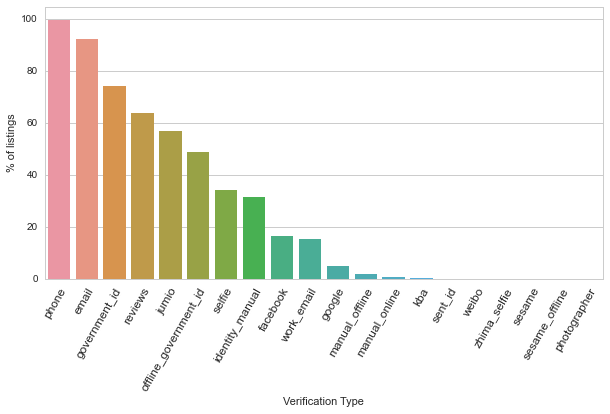

In [27]:
plt.figure(figsize=(10,5))

sns.set(style="whitegrid")
chart = sns.barplot(x="Verification Type", y="% of listings", data=verifications_types)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium', 
    rotation_mode='anchor'
)

### Question 3
- What features assist in obtaining a good review score? 
    - Could the score be predicted?
    - importance of the features, rank features

#### The Data Preparation

In [28]:
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200414180850,2020-04-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,71%,89%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1,0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,12 months ago,t,27,57,84,359,2020-04-16,21,7,2010-08-18,2020-02-22,97,10,10,10,10,9,9,f,NaN,NaN,f,f,moderate,f,f,2,1,1,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200414180850,2020-04-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,50%,67%,f,https://a0.muscache.com/im/users/60302/

In [29]:
df = df_listings[["property_type","room_type","bed_type","accommodates","bathrooms",
                  "bedrooms","beds","price","security_deposit",
                  "cleaning_fee","review_scores_rating"]]

#df = df_listings[["property_type","room_type","bed_type","accommodates","bathrooms",
#             "bedrooms","beds","review_scores_rating"]]

#"amenities"

In [30]:
df.head()

,property_type,room_type,bed_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,review_scores_rating
0,Apartment,Private room,Real Bed,2,1.0,1,0,$65.00,$100.00,$15.00,97
1,Apartment,Entire home/apt,Real Bed,2,1.0,1,1,$100.00,$150.00,$50.00,96
2,Apartment,Entire home/apt,Real Bed,6,2.0,3,3,$300.00,$350.00,$90.00,94
3,Bed and breakfast,Private room,Real Bed,2,1.0,1,1,$150.00,NaN,NaN,NaN
4,Apartment,Entire home/apt,Real Bed,4,1.0,2,2,$65.00,$350.00,$55.00,93


In [31]:
df.isnull().sum()

property_type               0
room_type                   0
bed_type                    3
accommodates                0
bathrooms                 132
bedrooms                  142
beds                      942
price                       0
security_deposit        29682
cleaning_fee            21893
review_scores_rating    23157
dtype: int64

In [34]:
df = df.dropna(subset=["review_scores_rating"])

In [35]:
df = df.dropna(subset=['beds'])
df = df.dropna(subset=['bed_type'])
df = df.dropna(subset=['bedrooms'])
df = df.dropna(subset=['bathrooms'])

In [36]:
df['cleaning_fee'] = df['cleaning_fee'].fillna(0)

In [37]:
df['security_deposit'] = df['security_deposit'].fillna(0)

In [38]:
df.isnull().sum()

property_type           0
room_type               0
bed_type                0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
price                   0
security_deposit        0
cleaning_fee            0
review_scores_rating    0
dtype: int64

In [39]:
def data_float(column):
    column = column.str.replace('$', '', regex=True)
    column = column.str.replace(',', '', regex=True)
    column = column.astype(float)
    
    return column

df['price'] = data_float(df['price'])
df['security_deposit'] = data_float(df['security_deposit'])
df['cleaning_fee'] = data_float(df['cleaning_fee'])

In [40]:
def data_int(column):
    column = column.astype('int64')
    
    return column
    
df['accommodates'] = data_int(df['accommodates'])
df['review_scores_rating'] = data_int(df['review_scores_rating'])

In [41]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
#scaler = MinMaxScaler()
#numerical = ["accommodates","bathrooms","bedrooms","beds","price","security_deposit", "cleaning_fee"]
#df[numerical] = scaler.fit_transform(df[numerical])

In [42]:
df = pd.get_dummies(df)

In [43]:
df.shape

(62918, 111)

In [44]:
df.head()

,accommodates,price,security_deposit,cleaning_fee,review_scores_rating,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Hut,property_type_Island,property_type_Loft,property_type_Minsu (Taiwan),property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Windmill,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bathrooms_0.0,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_10.0,bathrooms_10.5,bathrooms_11.0,bathrooms_11.5,bathrooms_17.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,bathrooms_6.5,bathrooms_7.0,bathrooms_7.5,bathrooms_8.0,bathrooms_8.5,bathrooms_9.0,bathrooms_9.5,bedrooms_0,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_16,bedrooms_2,bedrooms_22,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,beds_0,beds_1,beds_10,beds_11,beds_12,beds_13,beds_14,beds_15,beds_16,beds_17,beds_18,beds_19,beds_2,beds_20,beds_21,beds_28,beds_3,beds_4,beds_5,beds_6,beds_7,beds_8,beds_9
0,2,65.0,100.0,15.0,97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,100.0,150.0,50.0,96,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,300.0,350.0,90.0,94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,65.0,350.0,55.0,93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,2,29.0,100.0,0.0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
rating_scores = df['review_scores_rating'].value_counts()

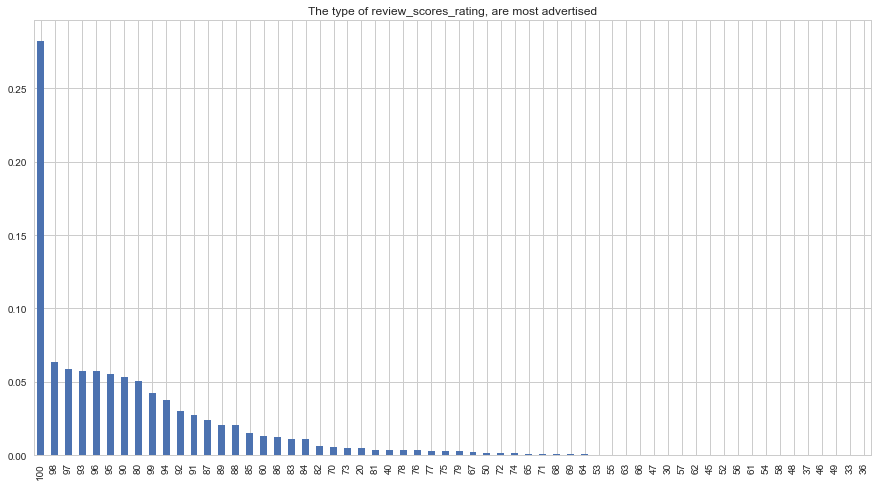

In [46]:
plt.figure(figsize=(15,8))

(rating_scores/df.shape[0]).plot(kind="bar");
plt.title("The type of review_scores_rating, are most advertised");

In [47]:
np.any(np.isnan(df))

True

In [48]:
np.isnan(df).sum()

accommodates                0
price                       0
security_deposit        17587
cleaning_fee            11263
review_scores_rating        0
                        ...  
beds_5                      0
beds_6                      0
beds_7                      0
beds_8                      0
beds_9                      0
Length: 111, dtype: int64

In [49]:
df['cleaning_fee'] = df['cleaning_fee'].fillna(0)

In [50]:
df['security_deposit'] = df['security_deposit'].fillna(0)

In [51]:
#x = df[["property_type","room_type","bed_type","accommodates","bathrooms",
   #          "bedrooms","beds","price","security_deposit",
    #         "cleaning_fee"]]
X = df.drop('review_scores_rating', axis = 1)
y = df['review_scores_rating']

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [54]:
pipeline = Pipeline([
    ('clf', SVC(gamma='auto'))
])

In [117]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [119]:
#Predict and score the model
y_test_preds = pipeline.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was -0.506414138715312 on 12584 values.'